In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import time
import os
%matplotlib inline

In [12]:
df=pd.read_csv("C:/Users/tirth/Downloads/movies_complete.csv")

In [14]:
original_df=df.copy()

In [15]:
df=original_df.copy()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [25]:
df.dtypes

id                         int64
title                     object
tagline                   object
release_date              object
genres                    object
belongs_to_collection     object
original_language         object
budget_musd              float64
revenue_musd             float64
production_companies      object
production_countries      object
vote_count               float64
vote_average             float64
popularity               float64
runtime                  float64
overview                  object
spoken_languages          object
poster_path               object
cast                      object
cast_size                  int64
crew_size                  int64
director                  object
dtype: object

In [29]:
for item in df:
    print(df[item].dtype)

int64
object
object
object
object
object
object
float64
float64
object
object
float64
float64
float64
float64
object
object
object
object
int64
int64
object


In [31]:
cat_values=[i for i in df if df[i].dtype=='object']
cat_values

['title',
 'tagline',
 'release_date',
 'genres',
 'belongs_to_collection',
 'original_language',
 'production_companies',
 'production_countries',
 'overview',
 'spoken_languages',
 'poster_path',
 'cast',
 'director']

In [32]:
num_values=[i for i in df if df[i].dtype!='object']
num_values

['id',
 'budget_musd',
 'revenue_musd',
 'vote_count',
 'vote_average',
 'popularity',
 'runtime',
 'cast_size',
 'crew_size']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [35]:
df.head(3)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch


In [36]:
df['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
44686           NaN
44687    2011-11-17
44688    2003-08-01
44689    1917-10-21
44690    2017-06-09
Name: release_date, Length: 44691, dtype: object

In [39]:
df['release_day']=pd.to_datetime(df['release_date']).dt.day
df['release_month']=pd.to_datetime(df['release_date']).dt.month
df['release_year']=pd.to_datetime(df['release_date']).dt.year
df.drop('release_date',axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   genres                 42586 non-null  object 
 4   belongs_to_collection  4463 non-null   object 
 5   original_language      44681 non-null  object 
 6   budget_musd            8854 non-null   float64
 7   revenue_musd           7385 non-null   float64
 8   production_companies   33356 non-null  object 
 9   production_countries   38835 non-null  object 
 10  vote_count             44691 non-null  float64
 11  vote_average           42077 non-null  float64
 12  popularity             44691 non-null  float64
 13  runtime                43179 non-null  float64
 14  overview               43740 non-null  object 
 15  sp

In [41]:
df.head(3)

,id,title,tagline,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,...,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,release_day,release_month,release_year
0,862,Toy Story,NaN,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,...,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,30.0,10.0,1995.0
1,8844,Jumanji,Roll the dice and unleash the excitement!,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,...,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,15.0,12.0,1995.0
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,...,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,22.0,12.0,1995.0


In [43]:
df['cast'].values

array(['Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette',
       'Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup|Leonard Zola|Lloyd Berry|Malcolm Stewart|Annabel Kershaw|Darryl Henriques|Robyn Driscoll|Peter Bryant|Sarah Gilson|Florica Vlad|June Lion|Brenda Lockmuller',
       'Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak',
       ...,
       'Erika Eleniak|Adam Baldwin|Julie du Page|James Remar|Damian Chapa|Louis Mandylor|Tom Wright|Jeremy Lelliott|James Quattrochi|Jason Widener|Joe Sabatino|Kiko Ellsworth|Don Swayze|Peter Dobson|Darrell Dubovsky',
       'Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlov|Aleksandr Chabrov|Vera Orlova',
    

In [44]:
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size,release_day,release_month,release_year
count,44691.000000,8854.000000,7385.000000,44691.000000,42077.000000,44691.000000,43179.000000,44691.000000,44691.000000,44657.000000,44657.000000,44657.000000
mean,107186.242845,21.669886,68.968649,111.653778,6.003341,2.957460,97.566850,12.479090,10.313643,14.230759,6.469087,1991.833688
std,111806.362236,34.359837,146.608966,495.322313,1.281060,6.040008,34.653409,12.124663,15.892154,9.270224,3.623405,24.056897
min,2.000000,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1874.000000
25%,26033.500000,2.000000,2.405420,3.000000,5.300000,0.402038,86.000000,6.000000,2.000000,6.000000,3.000000,1978.000000
50%,59110.000000,8.200000,16.872671,10.000000,6.100000,1.150055,95.000000,10.000000,6.000000,14.000000,7.000000,2001.000000
75%,154251.000000,25.000000,67.642693,35.000000,6.800000,3.768882,107.000000,15.000000,12.000000,22.000000,10.000000,2010.000000
max,469172.000000,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000,435.000000,31.000000,12.000000,2017.000000


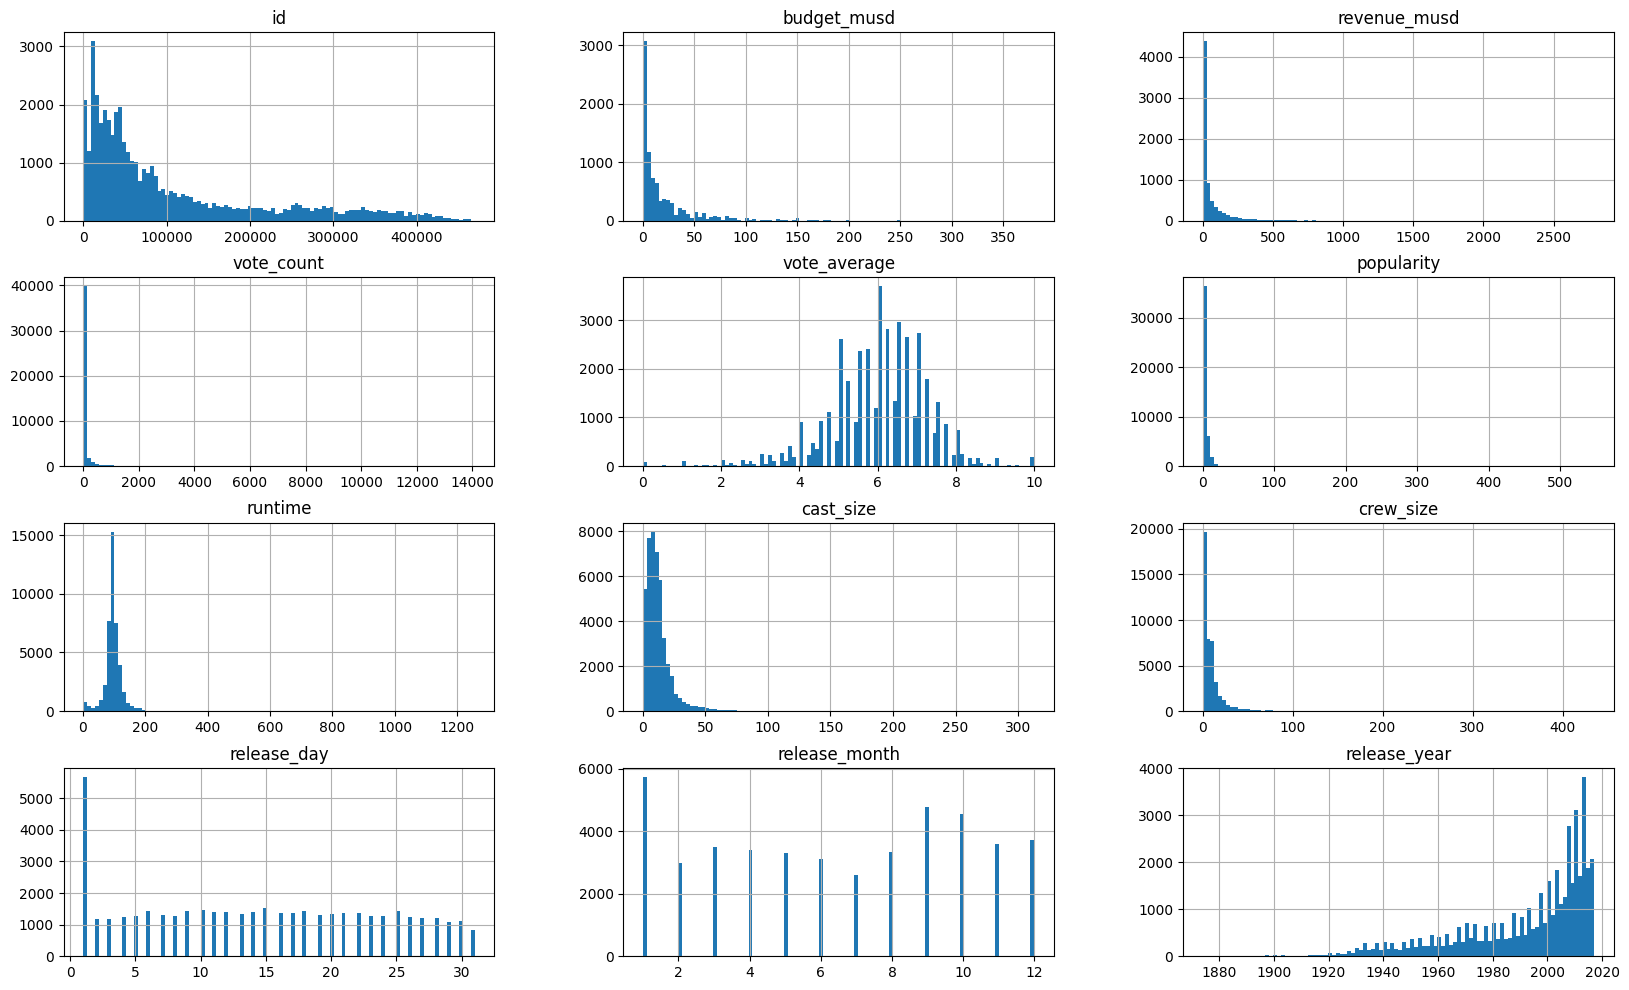

In [45]:
df.hist(figsize=(20,12),bins=100)
plt.show()

In [60]:
df['revenue_musd'].value_counts(dropna=False).sort_values(ascending=False).reset_index()

,revenue_musd,count
0,NaN,37306
1,12.000000,20
2,10.000000,19
3,11.000000,19
4,2.000000,18
...,...,...
6846,10.198357,1
6847,22.175908,1
6848,90.007945,1
6849,519.876949,1


In [62]:
df['vote_count'].value_counts(dropna=False).sort_values(ascending=False).reset_index()

,vote_count,count
0,1.0,3186
1,2.0,3056
2,3.0,2729
3,0.0,2614
4,4.0,2442
...,...,...
1815,1505.0,1
1816,724.0,1
1817,9629.0,1
1818,1300.0,1


In [64]:
df.describe(include='object')

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


In [65]:
df[df.title=='Cinderella']

,id,title,tagline,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,...,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,release_day,release_month,release_year
984,11224,Cinderella,The greatest love story ever told.,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.9,263.591415,RKO Radio Pictures|Walt Disney Productions,United States of America,...,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi,4.0,3.0,1950.0
12988,42884,Cinderella,NaN,TV Movie|Family|Fantasy|Music|Romance,NaN,en,NaN,NaN,Walt Disney Television|Citadel Entertainment|S...,United States of America,...,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove,2.0,11.0,1997.0
23254,92349,Cinderella,NaN,Fantasy|Drama,NaN,en,NaN,NaN,NaN,United States of America,...,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood,28.0,12.0,1914.0
23265,105875,Cinderella,The version children love!,Animation|Family|Fantasy,NaN,en,NaN,NaN,GoodTimes Entertainment,Japan|United States of America,...,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma,6.0,8.0,2002.0
28073,261985,Cinderella,NaN,Family|TV Movie,NaN,en,NaN,NaN,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,Italy,...,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay,30.0,10.0,2011.0
28340,150689,Cinderella,Midnight is just the beginning.,Romance|Fantasy|Family|Drama,NaN,en,95.0,543.514353,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,United Kingdom|United States of America,...,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//iH4C...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh,12.0,3.0,2015.0
33805,42651,Cinderella,NaN,Comedy|Family|Fantasy,NaN,ru,NaN,NaN,Lenfilm,Russia,...,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova,28.0,11.0,1947.0
35114,44459,Cinderella,NaN,Drama|Romance,NaN,en,NaN,NaN,NaN,United States of America,...,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson,31.0,3.0,1957.0
35116,289673,Cinderella,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,...,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron,1.0,1.0,2000.0
40439,114108,Cinderella,NaN,Fantasy|Horror|Science Fiction|Family,NaN,fr,NaN,NaN,Star-Film|Georges Méliès,France,...,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès,1.0,10.0,1899.0


#THE BEST AND THE WORST MOVIES

In [128]:
from IPython.display import HTML

In [68]:
df.head(2)

,id,title,tagline,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,...,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,release_day,release_month,release_year
0,862,Toy Story,NaN,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,...,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,30.0,10.0,1995.0
1,8844,Jumanji,Roll the dice and unleash the excitement!,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,...,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,15.0,12.0,1995.0


In [ ]:
#postr path -- title --- budget --- revernue --- vote count -- voteavg-- popularity

In [72]:
df_best=df[['poster_path','title','budget_musd','revenue_musd','vote_count','vote_average','popularity']]

In [73]:
df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519
...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Subdue,NaN,NaN,1.0,4.0,0.072051
44687,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,NaN,NaN,3.0,9.0,0.178241
44688,<img src='http://image.tmdb.org/t/p/w185//eGga...,Betrayal,NaN,NaN,6.0,3.8,0.903007
44689,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,NaN,NaN,0.0,NaN,0.003503


##for subsrract from 1 column to 2 col in dataframe use .sub e.g. df1.sub(df2)

##for divide from 1 column to 2 col in dataframe use .sub e.g. df1.div(df2)

In [78]:
df_best['profit']=df_best['revenue_musd'].sub(df_best['budget_musd'])
df_best['return']=df_best['revenue_musd'].div(df_best['budget_musd'])

C:\Users\tirth\AppData\Local\Temp\ipykernel_15916\1766895257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['profit']=df_best['revenue_musd'].sub(df_best['budget_musd'])
C:\Users\tirth\AppData\Local\Temp\ipykernel_15916\1766895257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['return']=df_best['revenue_musd'].div(df_best['budget_musd'])


In [77]:
df_best.drop('return',axis=1,inplace=True)

C:\Users\tirth\AppData\Local\Temp\ipykernel_15916\947766435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best.drop('return',axis=1,inplace=True)


In [79]:
df_best.head(3)

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit,return
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900,NaN,NaN


In [81]:
df_best.columns

Index(['poster_path', 'title', 'budget_musd', 'revenue_musd', 'vote_count',
       'vote_average', 'popularity', 'profit', 'return'],
      dtype='object')

In [84]:
df_best.rename(columns ={'poster_path':"", 'title':"title", 'budget_musd':'budget', 'revenue_musd':'revenue', 'vote_count':'votes',
       'vote_average':"avgrating", 'popularity':'popularity', 'profit':'profit', 'return':'roi'},inplace='True')

C:\Users\tirth\AppData\Local\Temp\ipykernel_15916\2573208655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best.rename(columns ={'poster_path':"", 'title':"title", 'budget_musd':'budget', 'revenue_musd':'revenue', 'vote_count':'votes',


In [85]:
df_best.head(3)

,,title,budget,revenue,votes,avgrating,popularity,profit,roi
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900,NaN,NaN


In [88]:
df_best.set_index('title',inplace=True)

In [89]:
df_best.head(3)

,,budget,revenue,votes,avgrating,popularity,profit,roi
title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.0,6.5,11.712900,NaN,NaN


In [90]:
df_best.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

In [113]:
forht=df_best.iloc[:16,0:3]

In [114]:
HTML(forht.to_html(escape=False))

,,budget,revenue
title,,,
Toy Story,,30.0,373.554033
Jumanji,,65.0,262.797249
Grumpier Old Men,,NaN,NaN
Waiting to Exhale,,16.0,81.452156
Father of the Bride Part II,,NaN,76.578911
Heat,,60.0,187.436818
Sabrina,,58.0,NaN
Tom and Huck,,NaN,NaN
Sudden Death,,35.0,64.350171


In [118]:
# a=(df_best.sort_values(by='avgrating',ascending=False).head(10).to_html())
# df_best[df_best['avgrating'].sort_values(ascending=False)]
df_best['avgrating'].index()

TypeError: 'Index' object is not callable

In [139]:
a=(df_best.iloc[0:,[0,1,4,6]].sort_values(by='profit',ascending=False)).head(5)
HTML(a.to_html(escape=False))

,,budget,avgrating,profit
title,,,,
Avatar,,237.0,7.2,2550.965087
Star Wars: The Force Awakens,,245.0,7.5,1823.223624
Titanic,,200.0,7.5,1645.034188
Jurassic World,,150.0,6.5,1363.528810
Furious 7,,190.0,7.3,1316.249360


In [140]:
df_best[df_best['profit']==max(df_best['profit'])]

,,budget,revenue,votes,avgrating,popularity,profit,roi
title,,,,,,,,
Avatar,<img src='http://image.tmdb.org/t/p/w185//btnl...,237.0,2787.965087,12114.0,7.2,185.070892,2550.965087,11.763566


In [123]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0               44467 non-null  object 
 1   budget      8854 non-null   float64
 2   revenue     7385 non-null   float64
 3   votes       44691 non-null  float64
 4   avgrating   42077 non-null  float64
 5   popularity  44691 non-null  float64
 6   profit      5371 non-null   float64
 7   roi         5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 4.1+ MB


In [141]:
(df_best.sort_values(by='roi',ascending=False))

,,budget,revenue,votes,avgrating,popularity,profit,roi
title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,0.000001,12.396383,77.0,6.1,4.028679,12.396382,1.239638e+07
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,0.000001,8.500000,881.0,8.1,8.159556,8.499999,8.500000e+06
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,0.000008,33.579813,49.0,7.7,4.222195,33.579805,4.197477e+06
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,0.000001,2.755584,3.0,6.0,0.230075,2.755583,2.755584e+06
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,0.000113,115.103979,457.0,5.9,9.231318,115.103866,1.018619e+06
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.0,4.0,0.072051,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.0,9.0,0.178241,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.0,3.8,0.903007,NaN,NaN


In [149]:
df_best[df_best['budget']>=5].sort_values(by='roi',ascending=False)

,,budget,revenue,votes,avgrating,popularity,profit,roi
title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.500000,792.965326,3359.0,7.3,19.358546,782.465326,75.520507
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2...,5.000000,368.744044,686.0,6.2,6.719949,363.744044,73.748809
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.000000,775.398007,6778.0,8.1,42.149697,764.398007,70.490728
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,7.000000,470.654000,2628.0,7.5,19.726114,463.654000,67.236286
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwO...,5.000000,328.203506,512.0,6.3,7.791212,323.203506,65.640701
...,...,...,...,...,...,...,...,...
The Blonde with Bare Breasts,<img src='http://image.tmdb.org/t/p/w185//zBjp...,7.500000,NaN,3.0,4.0,0.882188,NaN,NaN
Detroit,<img src='http://image.tmdb.org/t/p/w185//7APL...,34.000000,NaN,67.0,7.3,9.797505,NaN,NaN
"Good Guys Go to Heaven, Bad Guys Go to Pattaya",<img src='http://image.tmdb.org/t/p/w185//cfVB...,5.402000,NaN,153.0,5.3,5.613875,NaN,NaN


In [151]:
df_best.isnull().sum()

                224
budget        35837
revenue       37306
votes             0
avgrating      2614
popularity        0
profit        39320
roi           39320
dtype: int64

In [152]:
df_best['budget'].fillna(0,inplace=True)
df_best['votes'].fillna(0,inplace=True)

C:\Users\tirth\AppData\Local\Temp\ipykernel_15916\1862995492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['budget'].fillna(0,inplace=True)
C:\Users\tirth\AppData\Local\Temp\ipykernel_15916\1862995492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['votes'].fillna(0,inplace=True)


In [154]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0               44467 non-null  object 
 1   budget      44691 non-null  float64
 2   revenue     7385 non-null   float64
 3   votes       44691 non-null  float64
 4   avgrating   42077 non-null  float64
 5   popularity  44691 non-null  float64
 6   profit      5371 non-null   float64
 7   roi         5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 4.1+ MB


In [172]:
def best_worst(n,by,ascending=False,min_bud=0,min_votes=0):
    df1=df_best.loc[(df_best['budget']>=min_bud) & (df_best['votes']>=min_votes),['toim',by]].sort_values(by=by,ascending=ascending).head(n).copy()

    return HTML(df1.to_html(escape=False))

In [162]:
df_best.rename(columns={'':'toim'},inplace=True)

C:\Users\tirth\AppData\Local\Temp\ipykernel_15916\1873300091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best.rename(columns={'':'toim'},inplace=True)


__Movies Top 5 - Highest Revenue__

In [169]:
HTML((df_best[(df_best['budget']>=0) & (df_best['votes']>=0)][['toim','revenue']].sort_values(by='revenue',ascending=False).head(5)).to_html(escape=False))

,toim,revenue
title,,
Avatar,,2787.965087
Star Wars: The Force Awakens,,2068.223624
Titanic,,1845.034188
The Avengers,,1519.557910
Jurassic World,,1513.528810


In [173]:
best_worst(n=5,by='revenue')

,toim,revenue
title,,
Avatar,,2787.965087
Star Wars: The Force Awakens,,2068.223624
Titanic,,1845.034188
The Avengers,,1519.557910
Jurassic World,,1513.528810


__Movies Top 5 - Highest Budget__

In [174]:
best_worst(n=5,by='budget')

,toim,budget
title,,
Pirates of the Caribbean: On Stranger Tides,,380.0
Pirates of the Caribbean: At World's End,,300.0
Avengers: Age of Ultron,,280.0
Superman Returns,,270.0
Transformers: The Last Knight,,260.0


__Movies Top 5 - Highest Profit__

In [175]:
best_worst(n=5,by='profit')

,toim,profit
title,,
Avatar,,2550.965087
Star Wars: The Force Awakens,,1823.223624
Titanic,,1645.034188
Jurassic World,,1363.528810
Furious 7,,1316.249360


__Movies Top 5 - Highest Profit__

In [177]:
best_worst(n=5,by='profit',ascending=True)

,toim,profit
title,,
The Lone Ranger,,-165.710090
The Alamo,,-119.180039
Mars Needs Moms,,-111.007242
Valerian and the City of a Thousand Planets,,-107.447384
The 13th Warrior,,-98.301101


__Movies Top 5 - Return on investment__

In [180]:
best_worst(n=5,by='roi',ascending=False,min_bud=50)

,toim,roi
title,,
Minions,,15.631499
Jurassic Park,,14.604762
The Twilight Saga: New Moon,,14.196549
Deadpool,,13.501948
Despicable Me 2,,12.773183


__Movies Top 5 - Return on investment lowest__

In [186]:
best_worst(n=5,by='roi',ascending=True,min_bud=100)

,toim,roi
title,,
The Adventures of Pluto Nash,,0.071040
The Alamo,,0.178069
Live by Night,,0.209987
Mars Needs Moms,,0.259952
The Lone Ranger,,0.350157


__Movies Top 5 - votes__

In [187]:
best_worst(n=5,by='votes')

,toim,votes
title,,
Inception,,14075.0
The Dark Knight,,12269.0
Avatar,,12114.0
The Avengers,,12000.0
Deadpool,,11444.0


__Movies Top 5 - Higest rating__

In [196]:
best_worst(n=5,by='avgrating',min_votes=50)

,toim,avgrating
title,,
Planet Earth II,,9.5
Dilwale Dulhania Le Jayenge,,9.1
Planet Earth,,8.8
Sansho the Bailiff,,8.7
The Jinx: The Life and Deaths of Robert Durst,,8.6


__Movies Top 5 - lowest rating__

In [199]:
best_worst(n=5,by='avgrating',ascending=True,min_votes=100,min_bud=20)

,toim,avgrating
title,,
Dragonball Evolution,,2.9
Battlefield Earth,,3.0
Disaster Movie,,3.1
Alone in the Dark,,3.1
FearDotCom,,3.2


__Movies Top 5 - popular rating__

In [200]:
# best_worst(n=5,by='avgrating',ascending=True,min_votes=100,min_bud=20)
best_worst(n=5,by='popularity')

,toim,popularity
title,,
Minions,,547.488298
Wonder Woman,,294.337037
Beauty and the Beast,,287.253654
Baby Driver,,228.032744
Big Hero 6,,213.849907


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   genres                 42586 non-null  object 
 4   belongs_to_collection  4463 non-null   object 
 5   original_language      44681 non-null  object 
 6   budget_musd            8854 non-null   float64
 7   revenue_musd           7385 non-null   float64
 8   production_companies   33356 non-null  object 
 9   production_countries   38835 non-null  object 
 10  vote_count             44691 non-null  float64
 11  vote_average           42077 non-null  float64
 12  popularity             44691 non-null  float64
 13  runtime                43179 non-null  float64
 14  overview               43740 non-null  object 
 15  sp

In [207]:
# df.info()
print(df.genres.values)
print('\n')
print(df.cast.values)

['Animation|Comedy|Family' 'Adventure|Fantasy|Family' 'Romance|Comedy' ...
 'Action|Drama|Thriller' nan nan]


['Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'
 'Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup|Leonard Zola|Lloyd Berry|Malcolm Stewart|Annabel Kershaw|Darryl Henriques|Robyn Driscoll|Peter Bryant|Sarah Gilson|Florica Vlad|June Lion|Brenda Lockmuller'
 'Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak'
 ...
 'Erika Eleniak|Adam Baldwin|Julie du Page|James Remar|Damian Chapa|Louis Mandylor|Tom Wright|Jeremy Lelliott|James Quattrochi|Jason Widener|Joe Sabatino|Kiko Ellsworth|Don Swayze|Peter Dobson|Darrell Dubovsky'
 'Iwan Mosschuch

__Find Your next movie__

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [ ]:
df[(df['genres']==]

In [212]:
df.genres.nunique

<bound method IndexOpsMixin.nunique of 0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
44686                Drama|Family
44687                       Drama
44688       Action|Drama|Thriller
44689                         NaN
44690                         NaN
Name: genres, Length: 44691, dtype: object>

In [236]:
my_ge=df.loc[(df.genres.str.contains('Sci')==True) & (df.genres.str.contains('Action')==True),['genres']]

In [239]:
df.loc[(df.genres.str.contains('Sci')==True) & (df.genres.str.contains('Action')==True),['genres']]

,genres
65,Action|Science Fiction
96,Action|Adventure|Drama|Science Fiction|Thriller
157,Action|Adventure|Drama|Mystery|Science Fiction...
169,Adventure|Action|Drama|Science Fiction|Thriller
178,Action|Adventure|Science Fiction|Family|Fantasy
...,...
44424,Action|Science Fiction|Thriller
44530,Science Fiction|Action
44571,Fantasy|Horror|Action|Comedy|Science Fiction|F...
44583,Horror|Action|Science Fiction|Comedy


In [237]:
my_ac=df.loc[(df.cast.str.contains('Bruce Willis')==True),['cast']]

In [240]:
df.loc[(df.cast.str.contains('Bruce Willis')==True),['cast']]

,cast
17,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...
31,Bruce Willis|Madeleine Stowe|Brad Pitt|Christo...
162,Bruce Willis|Jeremy Irons|Samuel L. Jackson|Gr...
276,Paul Newman|Bruce Willis|Melanie Griffith|Jess...
291,John Travolta|Samuel L. Jackson|Uma Thurman|Br...
...,...
37664,Bruce Willis|Claire Forlani|Mark-Paul Gosselaa...
38783,Bruce Willis|Dave Bautista|Christopher Meloni|...
40848,James McAvoy|Anya Taylor-Joy|Betty Buckley|Hal...
44011,Bruce Willis|Jason Momoa|John Goodman|Thomas M...


In [246]:
df.loc[((df.genres.str.contains('Sci')==True) & (df.genres.str.contains('Action')==True)) & (df.cast.str.contains('Bruce Willis')==True),['title','vote_average']].sort_values(by='vote_average',ascending=False)

,title,vote_average
1448,The Fifth Element,7.3
19218,Looper,6.6
1786,Armageddon,6.5
14135,Surrogates,5.9
20333,G.I. Joe: Retaliation,5.4
27619,Vice,4.1
